# mobile price prediction #

## Loading data ##

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!ls 'drive/MyDrive/machine learning university/mobile price prediction'

test.csv  train.csv


In [38]:
#for read and manipulate data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [39]:
train = pd.read_csv('drive/MyDrive/machine learning university/mobile price prediction/train.csv')
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [40]:
train.shape

(2000, 21)

In [41]:
train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [43]:
train.price_range.nunique()

4

In [44]:
train.groupby(['price_range']).count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
2,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
3,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500


Text(0, 0.5, 'count')

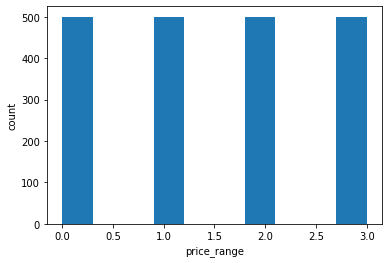

In [45]:
plt.hist(train.price_range)
plt.xlabel('price_range')
plt.ylabel('count')

## train test split ##

In [46]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(columns=['price_range']), train.price_range, test_size=0.2, random_state=0)

In [47]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600,), (400,))

## Logistic Regression ##

In [48]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)
y_prd = logisticReg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
from sklearn.metrics import precision_recall_fscore_support

percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.84       0.56382979 0.44329897 0.71559633]
recall: [0.88421053 0.57608696 0.43434343 0.68421053]
f1score: [0.86153846 0.56989247 0.43877551 0.69955157]


In [50]:
score = logisticReg.score(x_test, y_test)
print(score)

0.645


## changing classes ##

In [51]:
train_bi = train.copy()

In [52]:
train_bi.price_range[(train_bi.price_range == 1) | (train_bi.price_range == 2) | (train_bi.price_range == 3)] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
train_bi.price_range.nunique()

2

In [54]:
train_bi.groupby(['price_range']).count()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500,500
1,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500,1500


Text(0, 0.5, 'count')

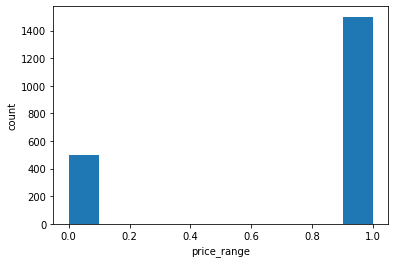

In [55]:
plt.hist(train_bi.price_range)
plt.xlabel('price_range')
plt.ylabel('count')

## resampling ##

In [56]:
from sklearn.utils import resample

In [57]:
#separate minroty and majority classes
train_df_majority = train_bi[train_bi['price_range'] == 1].copy()
train_df_minority = train_bi[train_bi['price_range'] == 0].copy()

#upsampling minority class
train_df_minority_upsampled = resample(train_df_minority, replace=True, n_samples=1500, random_state=123)

#combind majority class with upsampled minority class
train_df_upsampled = pd.concat([train_df_majority, train_df_minority_upsampled])

train_df_upsampled.price_range.value_counts()

1    1500
0    1500
Name: price_range, dtype: int64

In [58]:
x_train_ups, x_test_ups, y_train_ups, y_test_ups = train_test_split(train_df_upsampled.drop(columns=['price_range']), 
                                                                    train_df_upsampled.price_range, test_size=0.2, random_state=0)

In [59]:
x_train_ups.shape, x_test_ups.shape, y_train_ups.shape, y_test_ups.shape

((2400, 20), (600, 20), (2400,), (600,))

In [60]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()
logisticReg.fit(x_train_ups, y_train_ups)
y_prd_ups = logisticReg.predict(x_test_ups)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test_ups, y_prd_ups)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.89259259 0.95151515]
recall: [0.93774319 0.9154519 ]
f1score: [0.91461101 0.93313522]


## forward selection ##

In [62]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features

In [63]:
#scaling
standard_scaler = StandardScaler()
x_train[x_train.columns] = standard_scaler.fit_transform(x_train[x_train.columns])

In [76]:
x_test[x_test.columns] = standard_scaler.transform(x_test[x_test.columns])

In [64]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305


In [65]:
y_train.head()

582     0
159     1
1827    3
318     0
708     3
Name: price_range, dtype: int64

In [66]:
fs = forward_selection(x_train, y_train)

In [67]:
print(fs)

{'features': ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt', 'clock_speed', 'blue', 'fc', 'n_cores', 'pc', 'm_dep', 'sc_w', 'sc_h', 'wifi', 'touch_screen', 'int_memory', 'dual_sim', 'talk_time', 'three_g', 'four_g'], 'scores': [0.775, 0.84375, 0.915625, 0.953125, 0.98125, 0.984375, 0.98125, 0.98125, 0.984375, 0.98125, 0.98125, 0.98125, 0.978125, 0.978125, 0.978125, 0.975, 0.971875, 0.96875, 0.965625, 0.953125], 'features_rank': range(0, 20), 'best_features': ['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']}


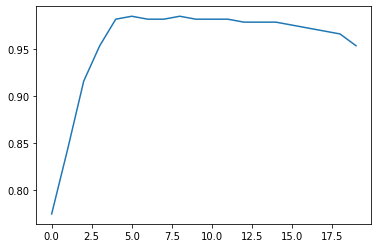

In [68]:
plt.plot(fs['features_rank'], fs['scores'])

In [69]:
print(fs['best_features'])

['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']


In [78]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']], y_train)
y_prd = logisticReg.predict(x_test[['ram', 'battery_power', 'px_height', 'px_width', 'mobile_wt']])

In [79]:
y_prd

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 1, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [80]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.97894737 0.9375     0.98947368 0.99122807]
recall: [0.97894737 0.97826087 0.94949495 0.99122807]
f1score: [0.97894737 0.95744681 0.96907216 0.99122807]


## pca ##

In [81]:
from sklearn.decomposition import PCA

In [87]:
x_pca = train.drop(columns=['price_range'])
y_pca = train.price_range

In [88]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_pca)
x_pca.shape

(2000, 5)

In [89]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y_pca, test_size=0.2, random_state=0)

In [90]:
logisticReg = LogisticRegression()
logisticReg.fit(x_pca_train, y_pca_train)
y_prd = logisticReg.predict(x_pca_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [91]:
percision, recall, f1score, support = precision_recall_fscore_support(y_pca_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.54285714 0.86666667 1.         0.61621622]
recall: [1.         0.14130435 0.25252525 1.        ]
f1score: [0.7037037  0.24299065 0.40322581 0.76254181]


## backward selection ##

In [96]:
def backward_selection(X, y):
  features = X.columns
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in rem_features:
      new_X = X[features.drop(feature)]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      logisticRegr = LogisticRegression()
      logisticRegr.fit(X_train, y_train)
      score = logisticRegr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    rem_features = rem_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]

  
  return final_features

In [93]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
582,-0.001608,-0.965592,1.671035,0.983880,-0.748114,0.976525,-0.430667,-0.692543,0.852842,0.216380,1.183752,-0.660982,-1.042159,-0.786095,0.882404,0.951809,0.911171,0.564840,-0.986343,-1.025320
159,1.374075,-0.965592,-1.270550,0.983880,1.810037,-1.024039,0.119443,0.693843,0.084708,-1.543255,1.018941,-0.773314,0.655005,-0.952286,-1.032614,-1.324225,-0.183466,-1.770414,-0.986343,-1.025320
1827,1.039205,-0.965592,0.690506,-1.016384,-0.050436,0.976525,-1.640908,1.387036,-0.939471,-1.543255,1.183752,2.794355,1.482833,1.555428,-0.793236,-0.641415,-0.730784,0.564840,1.013846,0.975305
318,-1.639756,-0.965592,-0.902852,-1.016384,0.647241,0.976525,0.559530,-0.692543,-1.280863,-1.543255,-0.299543,-1.384401,-1.623253,-1.337588,0.164273,1.407015,-0.730784,0.564840,-0.986343,-1.025320
708,-0.578580,1.035635,1.548469,0.983880,-0.515555,-1.024039,0.174453,0.347246,0.739044,-1.103346,0.854131,1.902438,1.385984,1.495079,1.600536,-0.641415,-0.183466,-1.770414,1.013846,0.975305


In [97]:
bs = backward_selection(x_train, y_train)
print(bs)

{'features': ['four_g', 'm_dep', 'n_cores', 'fc', 'sc_h', 'three_g', 'dual_sim', 'talk_time', 'clock_speed', 'sc_w', 'touch_screen', 'wifi', 'blue', 'pc', 'int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram'], 'scores': [0.965625, 0.965625, 0.9625, 0.959375, 0.959375, 0.959375, 0.95625, 0.95625, 0.953125, 0.953125, 0.953125, 0.953125, 0.95, 0.946875, 0.940625, 0.91875, 0.9125, 0.89375, 0.765625, 0.3125], 'features_rank': range(0, 20), 'best_features': []}


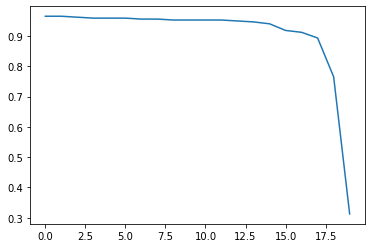

In [98]:
plt.plot(bs['features_rank'], bs['scores'])

In [102]:
logisticReg = LogisticRegression()
logisticReg.fit(x_train[['sc_h', 'three_g', 'dual_sim', 'talk_time', 'clock_speed', 'sc_w', 'touch_screen',
                        'wifi', 'blue', 'pc', 'int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']], y_train)
y_prd = logisticReg.predict(x_test[['sc_h', 'three_g', 'dual_sim', 'talk_time', 'clock_speed', 'sc_w', 'touch_screen',
                                   'wifi', 'blue', 'pc', 'int_memory', 'mobile_wt', 'px_width', 'px_height', 'battery_power', 'ram']])

In [103]:
percision, recall, f1score, support = precision_recall_fscore_support(y_test, y_prd)
print('percision:', percision)
print('recall:', recall)
print('f1score:', f1score)

percision: [0.97894737 0.89795918 0.95555556 0.95726496]
recall: [0.97894737 0.95652174 0.86868687 0.98245614]
f1score: [0.97894737 0.92631579 0.91005291 0.96969697]


## cross val ##

In [106]:
from sklearn.model_selection import cross_val_score

logisticReg = LogisticRegression()
scores_5 = cross_val_score(logisticReg, x_train, y_train, cv=5)
print(scores_5)
scores_10 = cross_val_score(logisticReg, x_train, y_train, cv=10)
print(scores_10)

[0.965625 0.95625  0.9625   0.95     0.971875]
[0.96875 0.96875 0.96875 0.9625  0.96875 0.95    0.9625  0.93125 0.9875
 0.95   ]
